In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl

#####Import the data and do basic analysis

In [ ]:
data_path = 'drive/MyDrive/datasets/oldcarprice.txt'

In [ ]:
#using pandas
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type',
'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
'city-mpg', 'highway-mpg', 'price']

#read dataset
oldcarprice = pd.read_csv(data_path, names = cols)

In [ ]:
print(oldcarprice.shape)
oldcarprice.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#the dataframe has a number of missing values that would rather be replaced with NaN
oldcarprice = oldcarprice.replace('?', np.NAN)
oldcarprice.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#find out if there are still any null values
oldcarprice.isnull().any().any()

True

In [ ]:
oldcarprice.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


#####How to deal with missing values: Either replace the row with the mean of the column, replace by frequency, or drop the rows entirely

In [ ]:
#Lets replace by mean
avg_normalized_losses = oldcarprice['normalized-losses'].astype('float').mean()
oldcarprice['normalized-losses'].replace(np.NAN, avg_normalized_losses, inplace = True)

In [ ]:
oldcarprice['normalized-losses']

,normalized-losses
0,122.0
1,122.0
2,122.0
3,164
4,164
...,...
200,95
201,95
202,95
203,95


In [ ]:
#num of doors
oldcarprice['num-of-cylinders'].value_counts()
#since four is the most frequent lets replace nan with four
oldcarprice['num-of-doors'].replace(np.NAN, 'four', inplace = True)

In [ ]:
#bore
avg_bore = oldcarprice['bore'].astype('float').mean()
oldcarprice['bore'].replace(np.NAN, avg_bore, inplace = True)

In [ ]:
#stroke
avg_stroke = oldcarprice['stroke'].astype('float').mean()
oldcarprice['stroke'].replace(np.NAN, avg_stroke, inplace = True)

In [ ]:
#horsepower
avg_horsepower = oldcarprice['horsepower'].astype('float').mean()
print(f'The average horsepower is: ', avg_horsepower)
oldcarprice['horsepower'].replace(np.NAN, avg_horsepower, inplace = True)

The average horsepower is:  104.25615763546799


In [ ]:
#peak rpm
avg_rpm = oldcarprice['peak-rpm'].astype('float').mean()
print(f'The average rpm is: ', avg_rpm)
oldcarprice['peak-rpm'].replace(np.NAN, avg_rpm, inplace = True)

The average rpm is:  5125.369458128079


In [ ]:
#For the price we'll just drop the rows because it is a sensitive column
oldcarprice.dropna(subset='price', axis=0, inplace=True)
#reset index
oldcarprice.reset_index(drop=True, inplace=True)

In [ ]:
#Find out any remaining nulls
oldcarprice.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [ ]:
oldcarprice.shape

(201, 26)

####Changing the data columns into their correct dtypes

In [ ]:
oldcarprice.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [ ]:
oldcarprice[['peak-rpm', 'bore', 'stroke', 'price']] = oldcarprice[['peak-rpm', 'bore', 'stroke', 'price']].astype('float')
oldcarprice[['normalized-losses']] = oldcarprice[['normalized-losses']].astype('int')

In [ ]:
oldcarprice.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


####Standardization and normalization of data

In [ ]:
#miles per gallon to litres per 100 km
oldcarprice['highway-mpg'] = 235/oldcarprice['highway-mpg']

In [ ]:
oldcarprice['city-mpg'] = 235/oldcarprice['city-mpg']
oldcarprice.rename(columns={'city-mpg' : 'city-L/100km'}, inplace= True)

In [ ]:
#rename the column to highway-L/100km
oldcarprice.rename(columns={'highway-mpg' : 'highway-L/100km'}, inplace= True)

In [ ]:
#normalize the length, width and height to range 0-1
oldcarprice['length'] = oldcarprice['length']/oldcarprice['length'].max()
oldcarprice['height'] = oldcarprice['height']/oldcarprice['height'].max()
oldcarprice['width'] = oldcarprice['width']/oldcarprice['width'].max()

In [ ]:
oldcarprice.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


####Divide the data into bins so that there is an analysis of how low, medium and high horsepower affects price

In [ ]:
oldcarprice['horsepower'] = oldcarprice['horsepower'].astype('int', copy = True)
oldcarprice.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


Text(0, 0.5, 'Count')

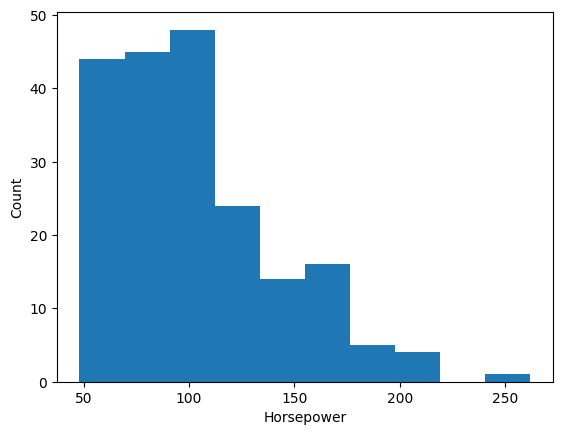

In [ ]:
#view how horsepower ranges
plt.hist(oldcarprice['horsepower'])
plt.xlabel('Horsepower')
plt.ylabel('Count')

In [ ]:
#create 3 bins using numpy
bins = np.linspace(min(oldcarprice['horsepower']), max(oldcarprice['horsepower']), 4)
groups = ['Low', 'Medium', 'High']

In [ ]:
#cut using pandas
oldcarprice['horsepower-bins'] = pd.cut(oldcarprice['horsepower'], bins, labels=groups, include_lowest=True)

In [ ]:
oldcarprice[['horsepower', 'horsepower-bins']]

,horsepower,horsepower-bins
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
...,...,...
196,114,Low
197,160,Medium
198,134,Medium
199,106,Low


####Indicator variable

In [ ]:
dummy_var1 = pd.get_dummies(oldcarprice['fuel-type'])
dummy_var1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [ ]:
dummy_var1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_var1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [ ]:
# merge data frame "df" and "dummy_var1"
oldcarprice = pd.concat([oldcarprice, dummy_var1], axis=1)
oldcarprice.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-bins,diesel,gas,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,11.190476,8.703704,13495.0,Low,False,True,False,True
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,11.190476,8.703704,16500.0,Low,False,True,False,True
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,12.368421,9.038462,16500.0,Medium,False,True,False,True
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,9.791667,7.833333,13950.0,Low,False,True,False,True
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,13.055556,10.681818,17450.0,Low,False,True,False,True


In [ ]:
#drop original
oldcarprice.drop('fuel-type',axis = 1,  inplace= True)

In [ ]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(oldcarprice['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [ ]:
#merge the new dataframe to the original datafram
oldcarprice = pd.concat([oldcarprice, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
oldcarprice.drop('aspiration', axis = 1, inplace=True)

In [ ]:
oldcarprice.drop(oldcarprice.columns[-4:-3], axis = 1, inplace=True)
oldcarprice.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-bins,gas,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,True,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,True,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,True,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,True,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,True,True,True,False


In [ ]:
oldcarprice.to_csv('drive/MyDrive/datasets/oldcarprice_v1.csv')